In [1]:
%run '../ipython_startup.py'

Importing commonly used libraries: os, sys, numpy as np, scipy as sp, pandas as pd, matplotlib as mp, matplotlib.pyplot as plt, datetime as dt, mclib_Python/flagging as fg
Creating project level variables: MCLAB = /home/jfear/mclab, PROJ = /home/jfear/mclab/cegs_ase_paper, TODAY = 20150830
Adding ['scripts/mclib_Python', 'scripts/ase_Python'] to PYTHONPATH


In [2]:
import cPickle as pickle

# Import Data

In [3]:
fname = '../../pipeline_output/100_genome_simulation/fb551_100_genome_flag_line_bias.csv'
df = pd.read_csv(fname, index_col='fusion_id')
df.head(3)

,line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,...,line91,line92,line93,line94,line95,line96,line97,line98,line99,line100
fusion_id,,,,,,,,,,,,,,,,,,,,,
F10001_SI,0,0,0,-1,0,0,0,0,0,0,...,0,0,0,0,0,0,-1,0,0,0
F10005_SI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F10009_SI,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


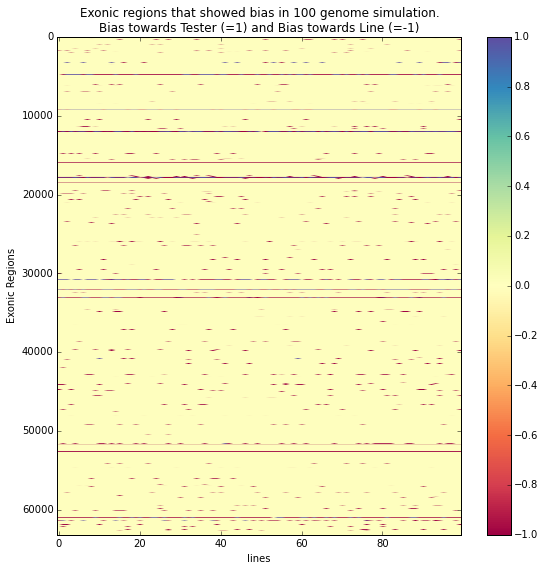

In [4]:
# Plot heatmap
fig = plt.figure(figsize=(8, 8))
plt.imshow(df, aspect='auto', cmap=plt.cm.Spectral)
plt.xlabel('lines')
plt.ylabel('Exonic Regions')
plt.title(u'Exonic regions that showed bias in 100 genome simulation.\nBias towards Tester (=1) and Bias towards Line (=-1)')
plt.colorbar()
plt.tight_layout()
plt.savefig('../../pipeline_output/100_genome_simulation/heatmap_genome_ambiguity_fb551_100_genome_simulation.png')

In [5]:
# Summarize exonic region bias across lines
numLineBias = df.apply(lambda x: sum(abs(x)), axis=1)
numLine = df.count(axis=1)

# Create flags DataFrame
flags = fg.FlagsDataFrame(index=df.index)

# Flag exonic regions with no bias
flags.addColumn('flag_exons_no_bias_simulated_lines', (numLineBias == 0))

# Flag exonic regions with any bias
flags.addColumn('flag_exons_w_bias_simulated_lines', (numLineBias > 0))

# Flag exonic regions with bias in 50% lines
flags.addColumn('flag_exons_bias_in_half_simulated_lines', (numLineBias >= 50))

# Flag exonic regions with bias in all 100 lines
flags.addColumn('flag_exons_bias_in_all_simulated_lines', (numLineBias == 100))

# Output counts
print(flags.sum())

# Output total number of exonic regions
print('Number of exonic regions: {}'.format(flags.shape[0]))

flag_exons_no_bias_simulated_lines         55647
flag_exons_w_bias_simulated_lines           7534
flag_exons_bias_in_half_simulated_lines     1372
flag_exons_bias_in_all_simulated_lines       807
dtype: int64
Number of exonic regions: 63181


In [7]:
# Export to excel table to publication
flagsI = flags.reset_index()
flagsI.to_excel('../../pipeline_output/100_genome_simulation/flag_exonic_region_w_and_wo_bias_100_genome_simulation.xls', index=None)

In [8]:
# Export list of fusion ids to drop (currently 807 in all lines)
dropList = flagsI.loc[flagsI['flag_exons_bias_in_all_simulated_lines'] == 1, 'fusion_id'].tolist()
pickle.dump(dropList, open(os.path.join(PROJ, 'pipeline_output/100_genome_simulation/exonic_region_drop_list.pkl'), 'wb'))